## Домашняя работа 3

### VK API

Установите библиотеку [vk](https://github.com/dimka665/vk) для работы с VK API в Python:

** pip install vk **

Импортируйте данную библиотеку: 

Авторизуйтесь:

In [1]:
# для авторизации использовался токен (так просто привычнее и быстрее)
import vk
token = '<здесь был токен>'
from credentials import *
session = vk.AuthSession(access_token=token, scope='wall')
api = vk.API(session)

**Задача 1. Формирование корпуса текстов** (10 баллов) 

Найдите две или более группы, которые публикуют достаточно содержательные посты (например, новости и т.п.). Тематика групп должна быть различной. 

С помощью [wall.get](https://vk.com/dev/wall.get) скачайте посты данных групп и сформируйте корпуса текстов, используя возможности [pandas](https://pythonspot.com/category/pandas/).

In [2]:
import pandas as pd
hp_wall = api.wall.get(domain = 'history_porn', v = 4.9, count = 100)
tvr_wall = api.wall.get(domain = 'tvrain', v = 4.9, count = 100)
hp_df = pd.DataFrame(data = hp_wall, columns = ['posts'])
tvr_df = pd.DataFrame(data = tvr_wall, columns = ['posts'])
df_raw = pd.concat([hp_df, tvr_df]).reset_index()
df_raw[:25]

,index,posts
0,0,49573
1,1,"{'reply_count': 0, 'media': {'thumb_src': 'htt..."
2,2,"{'reply_count': 0, 'media': {'thumb_src': 'htt..."
3,3,"{'reply_count': 0, 'media': {'thumb_src': 'htt..."
4,4,"{'reply_count': 0, 'media': {'thumb_src': 'htt..."
5,5,"{'reply_count': 0, 'marked_as_ads': 0, 'text':..."
6,6,"{'reply_count': 0, 'media': {'thumb_src': 'htt..."
7,7,"{'reply_count': 0, 'media': {'thumb_src': 'htt..."
8,8,"{'reply_count': 0, 'media': {'thumb_src': 'htt..."
9,9,"{'reply_count': 0, 'marked_as_ads': 0, 'text':..."


**Задача 2. Предобработка ** (15 баллов)

Предобработайте корпуса текстов: 
* Очистите тексты от мусора, используя [регулярные выражения](https://docs.python.org/2/library/re.html)
* [Лемматизируйте текст](https://github.com/arinaaageeva/Lemmatization)
* Удалите стоп-слова

Список стоп-слов можно получить с помощью модуля [stop-words](https://pypi.python.org/pypi/stop-words)

In [3]:
import re
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('russian')
from nltk.tokenize import word_tokenize
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [4]:
def normalize(txt, stop):
    tokenized = word_tokenize(str(txt).lower())
    nonsymbolic = re.sub('[\W\d]+', ' ', ' '.join(tokenized))
    words_only = re.findall(r'[а-яА-Я]+', nonsymbolic)
    no_stopwords = list(filter(lambda a: a not in stop, words_only))
    lemmas = [morph.parse(w)[0].normal_form for w in no_stopwords]
    return ' '.join(lemmas)

In [5]:
dataset = []
for i in df_raw.posts[2:]:
    dataset.append(normalize(i, stopwords))
df = pd.DataFrame(data = dataset, columns = ['posts'])

In [6]:
df[166:177]

,posts
166,перерыв вс дмитрий быков снова мы нашуметь пос...
167,узнать покупка дерипаска гражданство кипр узна...
168,суперполитбюро путин константин гааз послание ...
169,выходной довлатов высокий мода русский рок смо...
170,путин предложить сша сделать запрос генпрокура...
171,ядерный путин президент заниматься год мирный ...
172,доктор джекил мистер хайд путин спорить путин ...
173,наш ракета бояться путин эксплуатировать детск...
174,оскар победить понедельник стать ясно год взят...
175,залезать мозг вылезать реклама запретить росси...


** Задача 3. Выделение признаков** (5 баллов)

Воспользуйтесь [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) для векторизации текстов. 

Сначала нужно создать и обучить vectorizer:

```

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=<сюда передайте список стоп слов>).fit(<сюда передайте весь корпус текстов>)
```

Что бы преообразовать тексты в векторное представление используйте метод transform:
```
tfidf_vectors = vectorizer.transform(<список текстов>)
```
Получение списка имён признаков:
```
features_names = vectorizer.get_features_name()
```
Для каждой группы получите список топ-токенов и выведите .

In [7]:
# даже не буду скрывать, что для выполнения задания пользовался сторонним источником:
# https://gist.github.com/StevenMaude/ea46edc315b0f94d03b9)
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vectorizer = TfidfVectorizer()

In [8]:
# первая половина датафрейма -- это посты "History Porn"
# смотрим 25 топ-токенов
tfidf_vectors = vectorizer.fit_transform(df.posts[:101])
features = vectorizer.get_feature_names()
scores = zip(vectorizer.get_feature_names(), np.asarray(tfidf_vectors.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
for i in sorted_scores[:25]:
    print ("{0:50} Значение: {1}".format(i[0], i[1]))

год                                                Значение: 6.254048738515436
история                                            Значение: 2.479585629143808
это                                                Значение: 2.212791417789602
юбка                                               Значение: 2.1666058681216707
который                                            Значение: 1.9559591569067292
свой                                               Значение: 1.8960982389681098
работа                                             Значение: 1.7983230557644871
один                                               Значение: 1.7319714000854156
время                                              Значение: 1.6631906394634106
статья                                             Значение: 1.6510468617145064
ссср                                               Значение: 1.612331839070979
читать                                             Значение: 1.5983477443938923
утро                                        

C:\Users\Eolain\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [9]:
# вторая половина датафрейма -- это посты "Дождя"
# и опять 25 топ-токенов
tfidf_vectors = vectorizer.fit_transform(df.posts[101:])
features = vectorizer.get_feature_names()
scores = zip(vectorizer.get_feature_names(), np.asarray(tfidf_vectors.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
for item in sorted_scores[:25]:
    print ("{0:50} Значение: {1}".format(item[0], item[1]))

путин                                              Значение: 4.6288240320311695
россия                                             Значение: 3.057961792643991
который                                            Значение: 2.537244782214633
это                                                Значение: 2.3941922208074597
послание                                           Значение: 2.294914812884842
год                                                Значение: 2.2899677503175013
оскар                                              Значение: 1.9439881227552787
свой                                               Значение: 1.915438339004776
человек                                            Значение: 1.8953213461271783
наш                                                Значение: 1.83681575286796
президент                                          Значение: 1.822929351296916
один                                               Значение: 1.7685057901958579
программа                                      

C:\Users\Eolain\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [ ]:
# как на выборах: Путин -- вот неожиданность! -- опять победил с большим отрывом

**Задача 4. Визуализация** (5 баллов)

Визуализируйте токены для каждого сообщества с помощью [WORDCLOUD](https://python-graph-gallery.com/wordcloud/)

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

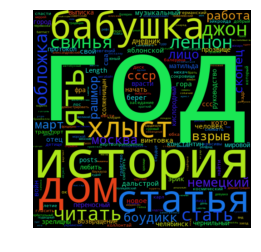

In [11]:
# делаем красоту для "History Porn":
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(df.posts[:101]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

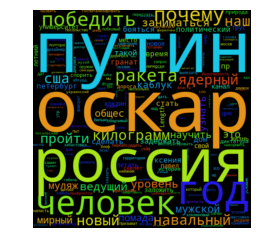

In [12]:
# ...и для "Дождя":
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(df.posts[101:]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Задача 5. Поиск коллокаций** (15 баллов)

Для каждого сообщества найдите статистические значиммые коллокации с помощью PMI

In [ ]:
# увы, не успел :(